# Project 3: Part 3 Modeling

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
import datetime as dt
import numpy as np
import pickle
from tqdm import tqdm

%matplotlib inline

from sklearn import metrics

import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

In [184]:
with open("users.pkl", 'rb') as picklefile: 
    users = pickle.load(picklefile)

In [185]:
y = users['US']
users = users.drop('US', axis = 1)

In [186]:
users = users.drop('id',axis = 1)

In [187]:
users.shape

(88908, 17)

In [188]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: US, dtype: uint8

In [189]:
xtrain, xtest, ytrain, ytest = train_test_split(users.iloc[:,:], y, test_size=0.2,stratify = y)#, random_state = 1234)

In [190]:
xtrain.head()

,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_app_Moweb,signup_app_Web,signup_app_iOS,diff_account_to_first_active,diff_account_to_first_booking,age,total_sessions,total_sessions_on_mac,total_sessions_on_windows,total_sessions_on_iphone,total_sessions_on_android,no_age_entered
10990,0,0,0,0,0,0,1,0,1,5,26.0,0.0,0.0,0.0,0.0,0.0,0
50991,0,0,0,0,0,0,1,0,1,1,105.0,0.0,0.0,0.0,0.0,0.0,0
22707,0,1,0,0,0,0,1,0,1,0,31.0,0.0,0.0,0.0,0.0,0.0,0
32241,1,0,0,0,0,0,1,0,1,48,31.0,0.0,0.0,0.0,0.0,0.0,0
79446,1,0,0,0,0,0,1,0,1,2,35.0,10.0,10.0,0.0,0.0,0.0,0


## KNN

In [191]:
normalizer = preprocessing.Normalizer()
users_norm = normalizer.fit_transform(users)

In [192]:
xtrain_norm, xtest_norm, ytrain_norm, ytest_norm = train_test_split(users_norm, y, test_size=0.2,stratify = y)#, random_state = 1234)

In [119]:
k_range = list(range(1,31))
k_auc = []
for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain_norm, ytrain_norm)
    y_score = knn.predict_proba(xtest_norm)[:,1]
    fpr, tpr,_ = roc_curve(ytest_norm, y_score)
    roc_auc = auc(fpr, tpr)
    k_auc.append(roc_auc)
print(k_auc)

  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 

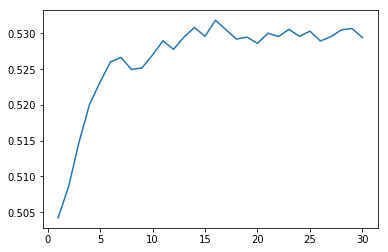

In [63]:
plt.plot(k_range, k_auc)
plt.savefig('knn_k_auc')

In [61]:
np.argmax(np.array(k_auc))

15

In [193]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(xtrain_norm, ytrain_norm)
y_pred = knn.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn.predict(xtest_norm)))

Accuracy: 0.676
             precision    recall  f1-score   support

          0       0.34      0.09      0.15      5307
          1       0.71      0.92      0.80     12475

avg / total       0.60      0.68      0.60     17782

[[  497  4810]
 [  959 11516]]


In [194]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain_norm, ytrain_norm)
y_pred = knn5.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, knn5.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,knn5.predict(xtest_norm)))

Accuracy: 0.645
             precision    recall  f1-score   support

          0       0.33      0.18      0.23      5307
          1       0.71      0.84      0.77     12475

avg / total       0.59      0.65      0.61     17782

[[  947  4360]
 [ 1950 10525]]


## SVMs

### Linear

In [29]:
l_svm = SVC(kernel='linear')
l_svm.fit(xtrain_norm, ytrain_norm)
y_pred = l_svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,l_svm.predict(xtest_norm)))

Accuracy: 0.702


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      5307
          1       0.70      1.00      0.82     12475

avg / total       0.49      0.70      0.58     17782

[[    0  5307]
 [    0 12475]]


### RBF

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma = 0.001)
rbf_svm.fit(xtrain_norm, ytrain_norm)
y_pred = svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,rbf_svm.predict(xtest_norm)))

## Logistic Regression

In [137]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, lr.predict(xtest)))
print(metrics.classification_report(ytest, lr.predict(xtest)))
print(metrics.confusion_matrix(ytest,lr.predict(xtest)))
# Needs work: print(cross_val_score(lr, xtest, ytest, cv=10, scoring='f1'))

Accuracy: 0.533
             precision    recall  f1-score   support

          0       0.33      0.55      0.41      5307
          1       0.73      0.53      0.61     12475

avg / total       0.61      0.53      0.55     17782

[[2914 2393]
 [5920 6555]]


In [181]:
lr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Random Forests

### Random Forests with Upsampling

In [195]:
from sklearn.utils import resample

In [196]:
with open("users.pkl", 'rb') as picklefile: 
    users = pickle.load(picklefile)

In [197]:
users.US.value_counts()

1    62376
0    26532
Name: US, dtype: int64

In [198]:
# Separate majority and minority classes
users_majority = users[users.US==1]
users_minority = users[users.US==0]
 
# Upsample minority class
users_minority_upsampled = resample(users_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=62376,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
users_upsampled = pd.concat([users_majority, users_minority_upsampled])
 
# Display new class counts
users_upsampled.US.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    62376
0    62376
Name: US, dtype: int64

In [199]:
y_upsampled = users_upsampled['US']
users_upsampled = users_upsampled.drop('US', axis = 1)

In [200]:
users_upsampled = users_upsampled.drop('id',axis = 1)

In [201]:
xtrain_up, xtest_up, ytrain_up, ytest_up = train_test_split(users_upsampled, y_upsampled, test_size=0.2,stratify = y)#, random_state = 1234)

In [202]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain_up, ytrain_up)
y_pred = rf.predict(xtest_up)
y_score = rf.predict_proba(xtest_up)[:,1]
fpr, tpr,_ = roc_curve(ytest_up, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_up, rf.predict(xtest_up)))
print(metrics.classification_report(ytest_up, rf.predict(xtest_up)))
print(metrics.confusion_matrix(ytest_up,rf.predict(xtest_up)))
print('ROC AUC:', roc_auc)

Accuracy: 0.719
             precision    recall  f1-score   support

          0       0.54      0.36      0.43      5301
          1       0.76      0.87      0.81     12481

avg / total       0.70      0.72      0.70     17782

[[ 1921  3380]
 [ 1615 10866]]
ROC AUC: 0.673197521693


In [203]:
n_range = list(range(10,100))
n_up_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain_up, ytrain_up)
    y_score = rf.predict_proba(xtest_up)[:,1]
    fpr, tpr,_ = roc_curve(ytest_up, y_score)
    roc_auc = auc(fpr, tpr)
    n_up_auc.append(roc_auc)
print(n_up_auc)


  7%|▋         | 6/90 [00:05<01:14,  1.13it/s]
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/Users/emilygeller/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/emilygeller/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/emilygeller/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 90/90 [05:45<00:00,  3.84s/it]

[0.68220013605740148, 0.6862965795917737, 0.68337861098388508, 0.68365341465037044, 0.68626902591996419, 0.68623582699504415, 0.68803799281038092, 0.68615803283771948, 0.68710425131995767, 0.68942055081618803, 0.68943973863097785, 0.68697883903699619, 0.68947150168161286, 0.68814061247837321, 0.68984706593675282, 0.68934740435720743, 0.68692098086053643, 0.68881933513851445, 0.68993151045918799, 0.68808258048555249, 0.68960832538652483, 0.68977059429521703, 0.6908077565203391, 0.68901277007642825, 0.68758941812645591, 0.68952740253470501, 0.69140642541046471, 0.69036620250594527, 0.69171672540072637, 0.68834542860930548, 0.68814934108258052, 0.69142639917749482, 0.69174276006868674, 0.68884778056382734, 0.69107642371356359, 0.69083094966866154, 0.69197353529524841, 0.69194879291414479, 0.68970272278492617, 0.69080847445748172, 0.69080313149369421, 0.69129624850939242, 0.69128127763066116, 0.69098593340466452, 0.69198584602793578, 0.69213479153470781, 0.69163577987720726, 0.691135075399

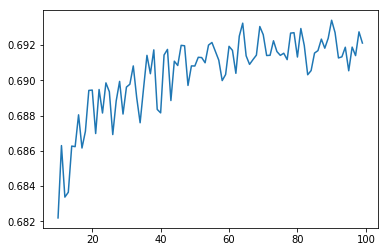

In [204]:
plt.plot(n_range, n_up_auc)
plt.savefig('n_up_auc')

In [205]:
np.argmax(np.array(n_up_auc))

80

In [206]:
rf_64 = RandomForestClassifier(n_estimators = 80)#class_weight = 'balanced')
rf_64.fit(xtrain_up, ytrain_up)
y_pred = rf_64.predict(xtest_up)
y_score = rf_64.predict_proba(xtest_up)[:,1]
fpr, tpr,_ = roc_curve(ytest_up, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_up, rf_64.predict(xtest_up)))
print(metrics.classification_report(ytest_up, rf_64.predict(xtest_up)))
print(metrics.confusion_matrix(ytest_up,rf_64.predict(xtest_up)))
print('ROC AUC:', roc_auc)

Accuracy: 0.738
             precision    recall  f1-score   support

          0       0.60      0.37      0.46      5301
          1       0.77      0.89      0.83     12481

avg / total       0.72      0.74      0.72     17782

[[ 1985  3316]
 [ 1338 11143]]
ROC AUC: 0.692706534003


In [207]:
features = pd.DataFrame()
features['importances'] = rf_64.feature_importances_
features['features'] = xtrain_up.columns
features.sort_values('importances',ascending = False)

,importances,features
9,0.360951,diff_account_to_first_booking
10,0.247473,age
11,0.151644,total_sessions
12,0.076642,total_sessions_on_mac
13,0.063506,total_sessions_on_windows
14,0.031262,total_sessions_on_iphone
3,0.019725,signup_method_facebook
0,0.015077,gender_FEMALE
1,0.014908,gender_MALE
6,0.004819,signup_app_Web


In [179]:
users.columns

Index(['gender_FEMALE', 'gender_MALE', 'gender_OTHER',
       'signup_method_facebook', 'signup_method_google', 'signup_app_Moweb',
       'signup_app_Web', 'signup_app_iOS', 'first_device_type_Android Tablet',
       'first_device_type_Desktop (Other)', 'first_device_type_Mac Desktop',
       'first_device_type_Other/Unknown',
       'first_device_type_SmartPhone (Other)',
       'first_device_type_Windows Desktop', 'first_device_type_iPad',
       'first_device_type_iPhone', 'first_browser_AOL Explorer',
       'first_browser_Android Browser', 'first_browser_Apple Mail',
       'first_browser_Avant Browser', 'first_browser_BlackBerry Browser',
       'first_browser_Camino', 'first_browser_Chrome',
       'first_browser_Chrome Mobile', 'first_browser_Chromium',
       'first_browser_CometBird', 'first_browser_CoolNovo',
       'first_browser_Firefox', 'first_browser_Googlebot', 'first_browser_IE',
       'first_browser_IE Mobile', 'first_browser_IceWeasel',
       'first_browser_Iron'

In [180]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(xtrain_up.columns)
dot_data = StringIO()  
export_graphviz(rf_64, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Random Forests, no upsampling

In [104]:
rf = RandomForestClassifier(n_estimators = 5)#class_weight = 'balanced')
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf.predict(xtest)))
print(metrics.classification_report(ytest, rf.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf.predict(xtest)))

Accuracy: 0.627
             precision    recall  f1-score   support

          0       0.33      0.24      0.27      5307
          1       0.71      0.79      0.75     12475

avg / total       0.60      0.63      0.61     17782

[[1253 4054]
 [2571 9904]]


In [50]:
n_range = list(range(10,100))
n_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain, ytrain)
    y_score = rf.predict_proba(xtest)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    n_auc.append(roc_auc)
print(n_auc)

100%|██████████| 90/90 [11:44<00:00,  7.83s/it]

[0.5240484283877388, 0.52583285394099222, 0.52621892158141637, 0.52422492574359858, 0.5245664020308004, 0.52504057087096778, 0.5237840567216534, 0.52351689431449966, 0.52785975632186799, 0.52878292439170016, 0.52234635616644565, 0.52897598468235585, 0.52730947361147851, 0.5297342797026211, 0.52607210137447846, 0.52766437419514722, 0.52675335984048277, 0.52507094381441088, 0.52940093362313878, 0.52694617055266901, 0.52635500235118049, 0.526294475790828, 0.52608549541900995, 0.52555035380243842, 0.52504727167472542, 0.52611051376983409, 0.52339368574337597, 0.52811424316796329, 0.52557115200823246, 0.52662272441914471, 0.52613092626344793, 0.52539016980290498, 0.52798619428712756, 0.52878867982246713, 0.52733621632263761, 0.52710116634522985, 0.52633832597162566, 0.52846772947363807, 0.52745347282541222, 0.52808079965304655, 0.52708493618172647, 0.5272252295335369, 0.5276590649804318, 0.5276889387669359, 0.52678790755105254, 0.52734595744593316, 0.52894036302806868, 0.52674887499101519, 

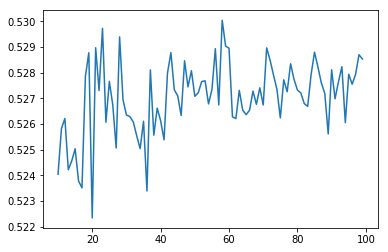

In [51]:
plt.plot(n_range, n_auc)
plt.savefig('rf_n_auc')

In [52]:
np.argmax(np.array(n_auc))

48

In [166]:
rf_plain = RandomForestClassifier(n_estimators = 48,  random_state=123, class_weight = 'balanced')
rf_plain.fit(xtrain, ytrain)
y_pred = rf_plain.predict(xtest)
y_score = rf_plain.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf_plain.predict(xtest)))
print(metrics.classification_report(ytest, rf_plain.predict(xtest)))
print(metrics.confusion_matrix(ytest,rf_plain.predict(xtest)))
print('ROC AUC:', roc_auc)

Accuracy: 0.636
             precision    recall  f1-score   support

          0       0.34      0.23      0.27      5307
          1       0.71      0.81      0.76     12475

avg / total       0.60      0.64      0.61     17782

[[ 1226  4081]
 [ 2391 10084]]
ROC AUC: 0.534476331597


In [20]:
features = pd.DataFrame()
features['importances'] = rf.feature_importances_
features['features'] = users.columns
features.sort_values('importances',ascending = False)

,importances,features
107,0.383984,age
108,0.158588,total_sessions
109,0.071473,total_sessions_on_mac
110,0.059289,total_sessions_on_windows
111,0.032232,total_sessions_on_iphone
25,0.028921,signup_method_facebook
0,0.026714,gender_FEMALE
1,0.026662,gender_MALE
105,0.024019,first_affiliate_tracked_untracked
102,0.014448,first_affiliate_tracked_omg


## Naive Bayes

### Gaussian

In [135]:
nb_g = naive_bayes.GaussianNB()
nb_g.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_g.predict(xtest)))
print(metrics.classification_report(ytest, nb_g.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_g.predict(xtest)))

Accuracy: 0.382
             precision    recall  f1-score   support

          0       0.31      0.89      0.46      5307
          1       0.78      0.17      0.28     12475

avg / total       0.64      0.38      0.33     17782

[[ 4703   604]
 [10378  2097]]


### Bernoulli

In [136]:
nb_b = naive_bayes.BernoulliNB()
nb_b.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_b.predict(xtest)))
print(metrics.classification_report(ytest, nb_b.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_b.predict(xtest)))

Accuracy: 0.698
             precision    recall  f1-score   support

          0       0.38      0.02      0.04      5307
          1       0.70      0.99      0.82     12475

avg / total       0.61      0.70      0.59     17782

[[  115  5192]
 [  185 12290]]


### Multinomial

In [124]:
nb_m = naive_bayes.MultinomialNB()
nb_m.fit(xtrain, ytrain)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, nb_m.predict(xtest)))
print(metrics.classification_report(ytest, nb_m.predict(xtest)))
print(metrics.confusion_matrix(ytest,nb_m.predict(xtest)))

ValueError: Input X must be non-negative

In [ ]:
users

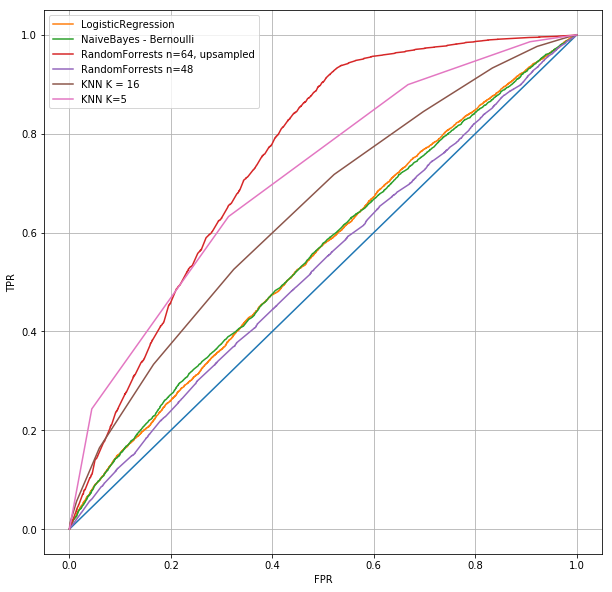

In [143]:
# What about ROC ? 

from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(users, y, test_size=0.2, stratify = y, random_state=1234)

lr_score=lr.predict_proba(xtest)[:,1]
#nb_m_score = nb_m.predict_proba(xtest)[:,1]
nb_b_score = nb_b.predict_proba(xtest)[:,1]
rf_64_score = rf_64.predict_proba(xtest_up)[:,1]
rf_plain_score = rf_plain.predict_proba(xtest)[:,1]
knn_score = knn.predict_proba(xtest)[:,1]
knn5_score = knn5.predict_proba(xtest)[:,1]
#l_svm_score = l_svm.predict_proba(xtest)[:,1]

lr_fpr, lr_tpr,_ = roc_curve(ytest, lr_score)
#nb_m_fpr, nb_m_tpr,_ = roc_curve(ytest, nb_m_score)
nb_b_fpr, nb_b_tpr,_ = roc_curve(ytest, nb_b_score)
rf_64_fpr, rf_64_tpr,_ = roc_curve(ytest_up, rf_64_score)
rf_plain_fpr, rf_plain_tpr,_ = roc_curve(ytest, rf_plain_score)
knn_fpr, knn_tpr,_ = roc_curve(ytest, knn_score)
knn5_fpr, knn5_tpr,_ = roc_curve(ytest, knn5_score)
#l_svm_fpr, l_svm_tpr,_ = roc_curve(ytest, l_svm_score)
#roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1])

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
#plt.plot(nb_m_fpr,nb_m_tpr, label = 'NaiveBayes - Multinomial')
plt.plot(nb_b_fpr,nb_b_tpr, label = 'NaiveBayes - Bernoulli')
plt.plot(rf_64_fpr,rf_64_tpr, label = 'RandomForrests n=64, upsampled')
plt.plot(rf_plain_fpr,rf_plain_tpr, label = 'RandomForrests n=48')
plt.plot(knn_fpr,knn_tpr, label = 'KNN K = 16')
plt.plot(knn5_fpr,knn5_tpr, label = 'KNN K=5')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.savefig('RocCurve')